<a href="https://colab.research.google.com/github/muscak/Cluster-Analysis/blob/master/Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis



We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling

## Problem Definition

## Data

The sample dataset is taken from the [original repo of the book](https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/data/sp500_data.csv.gz). You can see the data dictionary [here](./Data/README.md).

## Evaluation

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
⚠️ Due to the nature of experimentation, the evaluation metric may change over time.
</div>

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [14]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="ticks")
# we want our plots to appear inside the notebook
%matplotlib inline

# Clustering Methods
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## Load Data

In [3]:
sp500_px = pd.read_csv('Data/sp500_data.csv.gz', index_col=0)
sp500_px.shape

(5647, 517)

## Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [6]:
sp500_px.tail()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001
2015-07-01,-1.210022,0.020000,-0.009998,0.869995,0.329998,-0.190003,-0.039999,0.520004,-0.030000,-0.079998,...,-0.250000,1.270005,0.050003,-1.380001,-2.910003,1.180000,-2.099999,-8.719970,2.080001,0.940002


In [7]:
# Filter it for ExxonMobil (XOM) and Chevron (CVX):
oil_px = sp500_px[['XOM', 'CVX']]
oil_px.head()

,XOM,CVX
1993-01-29,-0.016991,0.072921
1993-02-01,0.016991,0.102089
1993-02-02,0.084954,0.029168
1993-02-03,0.067964,0.058337
1993-02-04,0.034378,0.044272


In [11]:
# Collect the data for the last 1 year of XOM and CVX
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1131 entries, 2011-01-03 to 2015-07-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XOM     1131 non-null   float64
 1   CVX     1131 non-null   float64
dtypes: float64(2)
memory usage: 26.5+ KB


In [25]:
df.describe()

,XOM,CVX,cluster
count,1131.000000,1131.000000,1131.000000
mean,0.030101,-0.004291,1.580018
std,0.717408,0.969030,1.306725
min,-2.950534,-4.363233,0.000000
25%,-0.383839,-0.577478,0.000000
50%,0.036802,0.029151,2.000000
75%,0.482905,0.604025,3.000000
max,3.376449,4.049643,3.000000


## Data Preprocessing

> Unsupervised learning techniques generally require that the data be appropriately scaled.

This is not the case for our exercise as the XOM and CVX values are almost on the same scale as can be seen from the above table.

> In the case of categorical data, you must convert it to numeric data, either by ranking (for an ordered factor) or by encoding as a set of binary (dummy) variables.

Again, since our sample dataset does not contain any categorical values, this requirement is also not applicable.

## $k$-Means Clustering

In [27]:
kmeans = KMeans(n_clusters=4, n_init=10).fit(df)
df['cluster'] = kmeans.labels_
df.head()

,XOM,CVX,cluster
2011-01-03,0.736805,0.240681,0
2011-01-04,0.168668,-0.584516,1
2011-01-05,0.026631,0.446985,0
2011-01-06,0.248558,-0.919751,1
2011-01-07,0.337329,0.180511,0


In [16]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
centers

,XOM,CVX
0,-0.328742,-0.573470
1,0.927032,1.346412
2,-1.143980,-1.750297
3,0.231540,0.316965


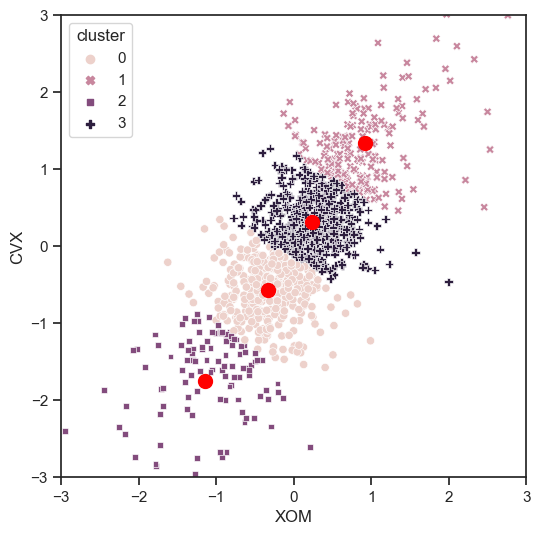

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sb.scatterplot(data=df, x='XOM', y='CVX', hue='cluster', style='cluster', ax=ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, color='red', s=100)
plt.show()

### Selecting the Number of Clusters

Using elbow method. We'll check the WCSS (within clusters sum of squares aka. distance between points in a cluster or inertia). 

$d(A, B) = d(B, A) = \sqrt{(a_1-b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2}$

Our target should have the WCSS small enough to be abel to interpret them properly.

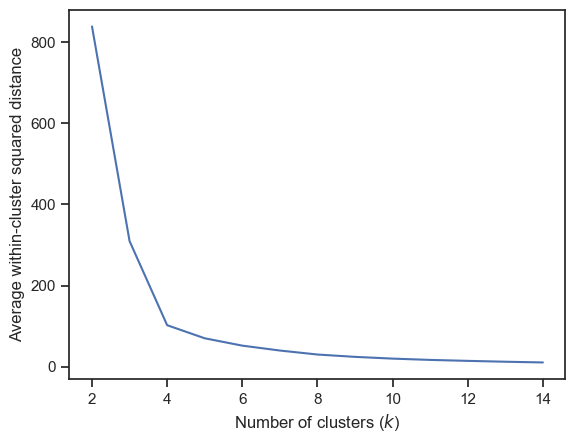

In [24]:
inertias = []

for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster, random_state=101, n_init=10).fit(df)
    inertias.append(kmeans.inertia_ / n_cluster)
    
df_inertia = pd.DataFrame({'n_cluster': range(2, 15), 'inertia':inertias})

ax = df_inertia.plot(x='n_cluster', y='inertia')
plt.xlabel('Number of clusters ($k$)')
plt.ylabel('Average within-cluster squared distance')
ax.legend().set_visible(False)
plt.show()

## Hierarchical Clustering

## Model-Based Clustering